# Repaso error estandar

$$T = (x_1 + x_2 + x_3 + ... + x_n)$$

$$Var(T) = (Var(x_1) + Var(x_2) + Var(x_3) + ... + Var(x_n))$$

$$Var(T) = n\sigma^2 $$

$$\mu = \frac{T}{n} $$

Varianza de la media

$$Var(\mu) = Var(\frac{T}{n}) = \frac{1}{n^2} Var(T) = \frac{1}{n^2} n\sigma^2 = \frac{\sigma^2}{n}$$

$$SE = \frac{\sigma}{\sqrt{n}} $$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Portafolios de inversión/Modulo 3/'
df = pd.read_csv(data_path + 'weight-height.csv')
df['Height'] = np.round(df.Height * 2.54) / 100
df['Weight'] = np.round(df.Weight * 0.453592)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


¿Cuál es la desviación estandard de la edad?

In [ ]:
df['IMC'] = df['Weight'] / (df['Height']**2)

¿Cuál es el error estandard e la media de la estatura?

$$SE = \frac{\sigma}{\sqrt{n}}$$

### Muestras con remplazo

In [ ]:
edad = [21, 20, 21, 21, 23, 23, 21, 20, 21, 21, 20, 21, 20, 21, 21, 21, 21, 23, 20, 23, 21, 22]

df = pd.DataFrame({
    "edad": edad
})

In [ ]:
df.sample(len(df), replace=True).mean()

edad    21.227273
dtype: float64

In [ ]:
df.sample(len(df), replace=True).mean()

edad    21.181818
dtype: float64

## Realiza bootstrap  de la estatura


In [ ]:
promedios = []
n = 10000
for i in range(n):
    promedios.append(df.sample(len(df), replace=True).mean()[0])

In [ ]:
np.mean(promedios)

21.18317272727273

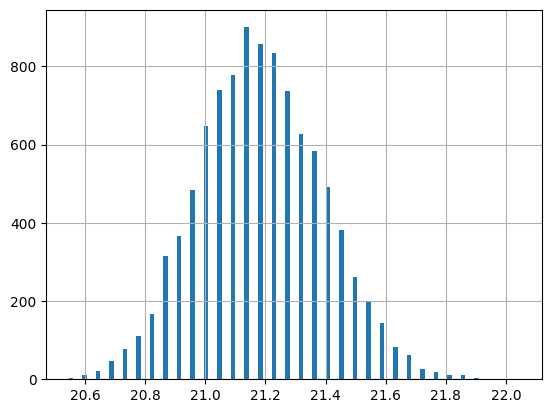

In [ ]:
plt.hist(promedios, bins=100)
plt.grid()

In [ ]:
np.std(promedios)

0.208706721945231

In [ ]:
se_edad = np.std(edad) / len(edad)**(1/2)

In [ ]:
# Cola inferior y superior
np.mean(edad) - 2*se_edad

20.76252393738956

In [ ]:
# No es lo mismo
np.mean(edad) + 2*se_edad

21.601112426246807

In [ ]:
# No es una distribución normal


### Realiza bootstrap de la altura

¿Con un 95% de confianza, la media del salón se encuntra entre?

### Ahora del IMC

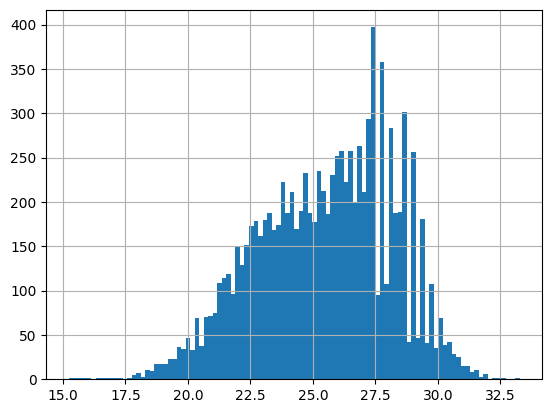

In [ ]:
plt.hist(df["IMC"], bins=100)
plt.grid()

In [ ]:
promedios_imc = []
n = 10000
for i in range(n):
    promedios_imc.append(df["IMC"].sample(len(df), replace=True).mean())

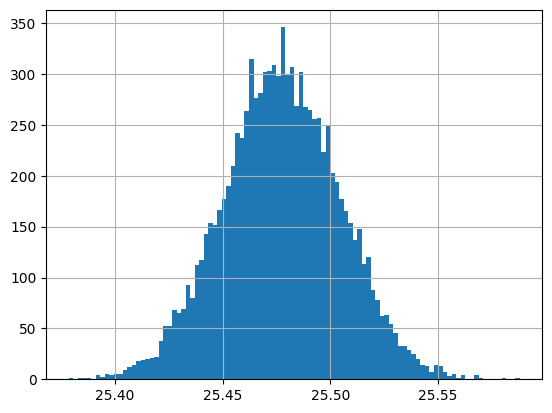

In [ ]:
plt.hist(promedios_imc, bins=100)
plt.grid()

In [ ]:
desviaciones_imc = []
n = 10000
for i in range(n):
    desviaciones_imc.append(df["IMC"].sample(len(df), replace=True).std())

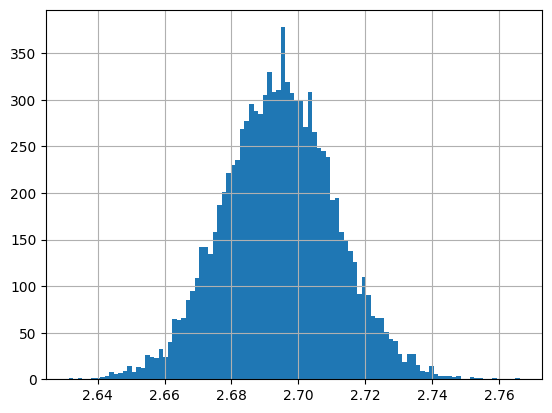

In [ ]:
plt.hist(desviaciones_imc, bins=100)
plt.grid()

In [ ]:
df1 = pd.DataFrame()
df1["desviaciones"] = desviaciones_imc

In [ ]:
np.mean(df1.desviaciones > 2.72)

0.0624

A esto se le conoce resampleo boostrap

<img style="margin: 15px 15px 15px 15px;" src="https://blogs.sas.com/content/iml/files/2018/12/bootstrapSummary.png" width="3000px" height="100px" />


<img style="margin: 15px 15px 15px 15px;" src="https://uc-r.github.io/public/images/analytics/bootstrap/bootstrap.png" width="3000px" height="100px" />


# Aplicación en la bolsa

In [ ]:
# Get tickers
import yfinance as yf
tickers = ['VTI', 'AMZN']
start_date = '2015-10-01'
end_date = "2022-10-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Adj Close']

returns = St.pct_change().dropna()
returns.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,AMZN,VTI
Date,,
2015-10-02,0.022699,0.014557
2015-10-05,0.020919,0.018434
2015-10-06,-0.011404,-0.003229
2015-10-07,0.008298,0.009030
2015-10-08,-0.016201,0.008658


# Desviación estandard de Amazon

In [ ]:
vol_amzn = np.std(returns["AMZN"])
vol_amzn

0.02067058304033697

# Error estandard Amazon

In [ ]:
error_amzn = returns["AMZN"].sem()
error_amzn

0.0004462085295353882

# Boostrap de la volatilidad de Amazon

In [ ]:
volatilidades_amzn = []
for i in range (10000):
    volatilidades_amzn.append(returns["AMZN"].sample(len(returns), replace=True).std())

In [ ]:
df_volatilidades_amazon = pd.DataFrame()
df_volatilidades_amazon["vol"] = volatilidades_amzn

¿Cuál es la probabilidad de que la volatilidad de amazon sea menor al 2%?

In [ ]:
(df_volatilidades_amazon["vol"] < 0.02).mean()

0.1333

# Boostrap de la correlación entre Amazon y VTI

In [ ]:
corr_amzn = []
for i in range (10000):
    corr_amzn.append(returns.sample(len(returns), replace=True).corr()["AMZN"]["VTI"])

In [ ]:
df_corr_amzn = pd.DataFrame()
df_corr_amzn["corr_amzn"] = corr_amzn

In [ ]:
df_corr_amzn.describe()

,corr_amzn
count,10000.000000
mean,0.630072
std,0.021574
min,0.543643
25%,0.615723
50%,0.630477
75%,0.644756
max,0.706949


In [ ]:
np.mean(df_corr_amzn.corr_amzn > 0.65)

0.1774

# Aplicación de la vida real

A las empresas que prestan dinero no les interesa tanto el porcentaje de pago sino a algo que se conoce como _loss rate_.

El _loss rate es_:

$$LR =1 -  \frac{\sum{Capital_i}}{\sum{Prestado_i}} $$


In [ ]:
df = pd.DataFrame()
df['monto'] = [2000, 3000, 1000, 5000, 1000, 7000, 4000]
df['pago'] = [0, 1, 0, 1, 0, 1, 1]
df

,monto,pago
0,2000,0
1,3000,1
2,1000,0
3,5000,1
4,1000,0
5,7000,1
6,4000,1


In [ ]:
# Calcula el loss rate
1 - (df.monto * df.pago).sum() / df.monto.sum()

0.17391304347826086

In [ ]:
# Calcula la morosidad
1 - np.mean(df.pago)

0.4285714285714286

Se desarrolla un nuevo modelo que ayuda a discriminar mejor, el modelo va a rechazar clientes

In [ ]:
df['acepta'] =  [1, 1, 0, 1, 1, 1, 0]

In [ ]:
df

,monto,pago,acepta
0,2000,0,1
1,3000,1,1
2,1000,0,0
3,5000,1,1
4,1000,0,1
5,7000,1,1
6,4000,1,0


In [ ]:
# Cacua el nuevo loss rate
df1 = df.query("acepta == 1")
1 - (df.monto * df1.pago).sum() / df1.monto.sum()

0.16666666666666663

¿Cuál es la prbobabilidad que el loss rate sea mayor a 40%?

In [ ]:
n = 10000
losses = []
for i in range(n):
    sample_df = df1.sample(len(df1), replace=True)
    lr = 1 - (sample_df.monto * sample_df.pago).sum() / sample_df.monto.sum()
    losses.append(lr)

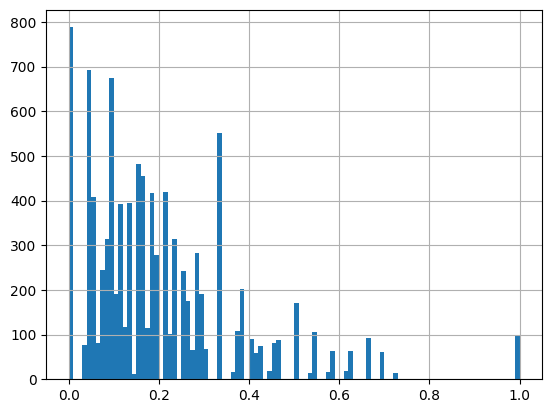

In [ ]:
plt.hist(losses, bins=100)
plt.grid()

In [ ]:
# Probabilidad mayor a 40%
df_losses = pd.DataFrame()
df_losses["loss_rate"] = losses

np.mean(df_losses.loss_rate > 0.4)

0.1036

In [ ]:
# Probabilidad menor a 15%
np.mean(df_losses.loss_rate < 0.15)

0.4385